# Methods of optimization

The standard __form__ of a continuous optimization __problem__ is:

<img src="main_problem.png" width="500">


There is __no single method__ available for solving all optimization problems efficiently. 

One can use a number of different methods depending on the specific problem. 

- __Mathematical programming methods.__ These are useful in finding the minimum of a function of several variables under a prescribed set of constraints.
- __Stochastic process techniques.__ These are used to analyze problems which are described by a set of random variables of known distribution.
- __Statistical methods.__These are used in the analysis of experimental data and in the construction of empirical models.

## Simple examples with SciPy: 1D optimization

__Non-conditional oprimization.__ Objective function to be minimized: $$min f(x^2 - 2x)$$

In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pylab as plt

In [39]:
#set objective function
objective = np.poly1d([1.0, -2.0, 0.0])

In [40]:
# initialize first value
x0 = 3.0
results = opt.minimize(objective,x0) 
print("Solution: x=%f" % results.x)

Solution: x=1.000000


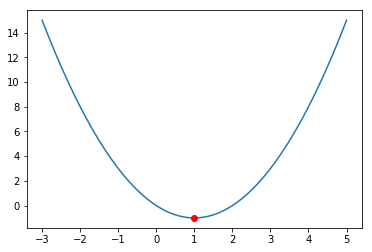

In [41]:
# plot result
x = np.linspace(-3,5,100)
plt.plot(x,objective(x))
plt.plot(results.x,objective(results.x),'ro')
plt.show()

__With condition.__ Objective function:

$$ min f(x^2 - 2x)$$
$$x - 2 >= 0$$

In [42]:
#set objective and conditions
objective = np.poly1d([1.0, -2.0, 0.0])
cons = ({'type': 'ineq','fun' : lambda x: np.array([x[0] - 2])}) 

results = opt.minimize(objective,x0=3.0,
                       constraints = cons,
                       options = {'disp':True})


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.3322676295501834e-14
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


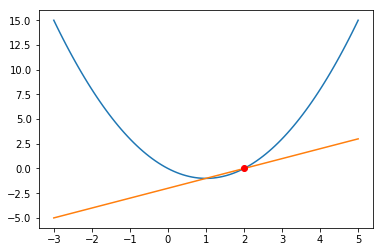

In [43]:
#plot results
x = np.linspace(-3,5,100)
cond = np.poly1d([1.0, -2.0])

plt.plot(x,objective(x))
plt.plot(x, cond(x))
plt.plot(results.x,objective(results.x),'ro')
plt.show()

## Newton's methods

Newton's method is a root finding method that uses linear approximation. 
We guess a solution of $x_0$ the equation $f(x) =0 $, compute the linear approximation of $f(x)$ at $x_0$ and then find the $x$-intercept of the linear approximation.

![alt text](Newton.gif)

### Implementation

In [44]:
def newton(f,Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None. '''

   
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

In [45]:
#set function and first derivative
f = lambda x: x**3 - x**2 - 1
Df = lambda x: 3*x**2 - 2*x

#apply optimization methods
approx = newton(f = f, Df = Df, x0 = 1, epsilon = 1e-10, max_iter = 10)
print(approx)

Found solution after 6 iterations.
1.4655712318767877


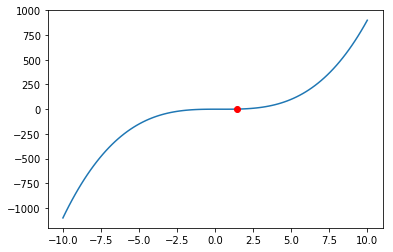

In [46]:
#plot results 

x = np.linspace(-10,10,100)
poly = np.poly1d([1.0, -1.0, 0, -1])

plt.plot(x,poly(x))
plt.plot(approx,poly(approx),'ro')
plt.show()

The __scipy.optimize__ package provides several commonly used optimization algorithms. This module contains the following aspects:
- __Unconstrained and constrained minimization of multivariate scalar functions__ (minimize()) using a variety of algorithms (e.g. BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP)
- Global (brute-force) optimization routines (e.g., anneal() (Metropolis alg), basinhopping())
- Least-squares minimization (leastsq()) and curve fitting (curve_fit()) algorithms
- Scalar univariate functions minimizers (minimize_scalar()) and root finders (newton())

Let's apply Newton's methods with ScyPy for minimization of Rosenbrock function

The __Rosenbrock function__ is a non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as Rosenbrock's valley or Rosenbrock's banana function.

__Rosenbrock function in SciPy__

In [47]:
from scipy.optimize import rosen

#or 

def rosen(x):
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

__Plot Rosenbork function__

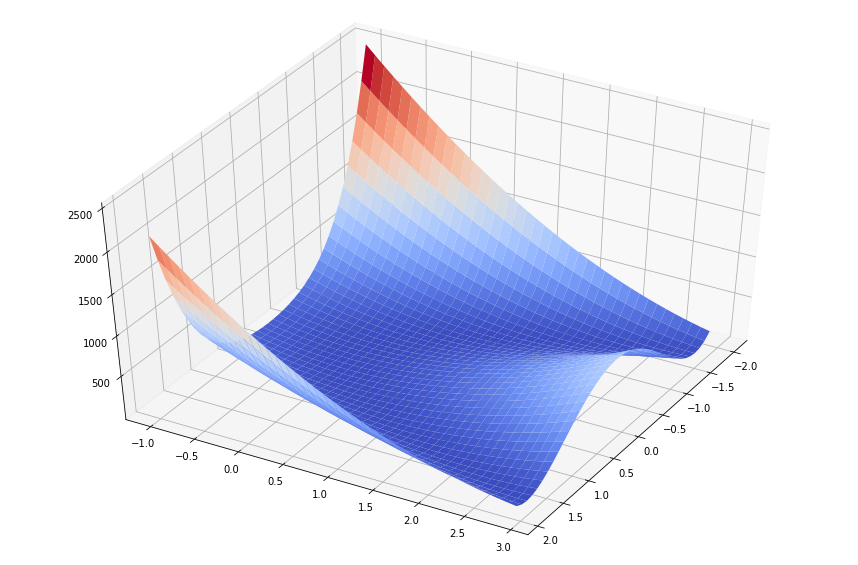

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# 3D plot
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# ang of view
ax.view_init(45, 30)

#generate data for plot
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen(np.array([X,Y]))

# plot data
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

### Newton-CG

Nonlinear conjugate gradient method generalizes the conjugate gradient method [(more)](https://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)

In [49]:
import scipy.optimize as opt
from scipy.optimize import rosen, rosen_der, rosen_hess

# to save intermidiate results
def reporter(p):
    global ps
    ps.append(p)

# initial starting position
x0 = np.array([4,-4.1])
ps = [x0]

opt.minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 1.3642782750354208e-13
     jac: array([ 1.21204353e-04, -6.08502470e-05])
 message: 'Optimization terminated successfully.'
    nfev: 38
    nhev: 26
     nit: 26
    njev: 63
  status: 0
 success: True
       x: array([0.99999963, 0.99999926])

Text(0.5,0,'iteration')

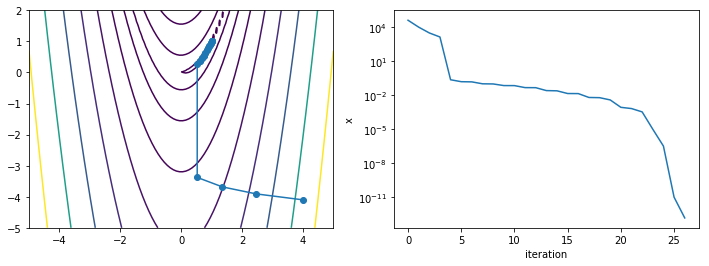

In [50]:
# plot results 

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 2, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')

plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));
plt.ylabel("x")
plt.xlabel("iteration")

### BFGS

Boyden–Fletcher–Goldfarb–Shanno algorithm [(more)](https://en.wikipedia.org/wiki/Broyden–Fletcher–Goldfarb–Shanno_algorithm)

In [51]:
ps = [x0]
opt.minimize(rosen, x0, method='BFGS', callback=reporter)

      fun: 4.4101876143268287e-13
 hess_inv: array([[0.49999063, 1.0000786 ],
       [1.0000786 , 2.00533179]])
      jac: array([ 1.56197299e-05, -3.93816939e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 54
     njev: 144
   status: 2
  success: False
        x: array([0.99999939, 0.99999876])

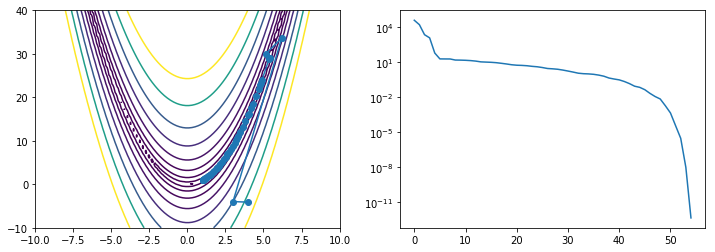

In [52]:
ps = np.array(ps)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 40, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

### Nelder-mead

__Nealder-Mead__ algorithm [(more)](https://en.wikipedia.org/wiki/Nelder–Mead_method)

![alt text](Nelder_Mead.gif)

In [53]:
ps = [x0]
opt.minimize(rosen, x0, method='nelder-mead', callback=reporter)

 final_simplex: (array([[0.99998846, 0.99997494],
       [0.99994401, 0.99989075],
       [1.0000023 , 1.0000149 ]]), array([5.26275688e-10, 3.87529507e-09, 1.06085894e-08]))
           fun: 5.262756878429089e-10
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 85
        status: 0
       success: True
             x: array([0.99998846, 0.99997494])

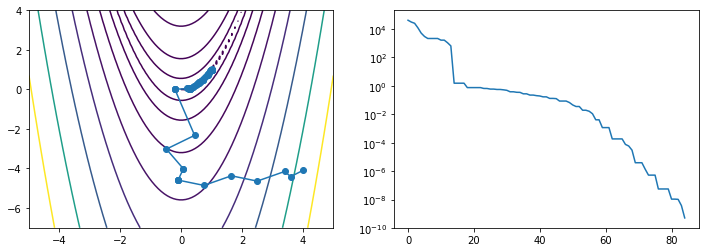

In [54]:
ps = np.array(ps)

x = np.linspace(-5, 5, 100)
y = np.linspace(-7, 4, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

## Gradient descent

Gradient descent is an algorithm used to the find local minimums of any differentiable function. 

More formally, given a differentiable function $f(x),$ the gradient descent algorithms helps us compute $x^*$ such that $f'(x^*) = 0$ and $x^*$ is a minimum of $f(x).$ A function can have many local minimums $x_{1}^{*}, x_{2}^{*}, \ldots, x_{k}^{*},$ the gradient descent algorithm will converge to one of them $\textbf{depending on the its starting position and learning rate.}$

__Single variable__

Suppose we have a single variable and differentiable function $f(x).$ Given a initial value $x_{1}$ the gradient descent describes the steps required to coverge towards a local minimum $x^*$ such that $f'(x^*) = 0.$ In the above section we determined that $x_{2} = x_{1} - \lambda f'(x_{1}),$ where $\lambda$ is the learning rate parameter. This formula can be generalized to $$x_{t+1} = x_{t} - \lambda f'(x_{t}),$$ for itteration $t.$ Given initial value $x_{1}$ and large number of itterations $T,$ this algorithm will generate $x_{1}, x_{2}, \ldots, x_{T},$ where $x_{T} \approx x^*.$ That is $x_{t+1}$ converges towards $x^*$ as $t$ gets very large. Notice that at convergence $f'(x_{t}) \approx 0$ and hence $|x_{t+1} - x_{t}| \approx 0.$ Therefore a common stopping criteria for gradience descent is to itterate until $|x_{t+1} - x_{t}|$ is a very small number. For example, we can keep iterating gradient descent until $|x_{t+1} - x_{t}|<0.001.$

__Multiple variables__

Consider a multiple variable and differentiable function $f(x_{1},x_{2},\ldots, x_{n}).$ Our goal is to apply gradient descent and find a minimum $(x_{1}^{*}, x_{2}^{*}, \ldots, x_{n}^{*}).$ This function has partial derivatives stored in the gradient vector $(\frac{df(x)}{dx_{1}}, \ldots, \frac{df(x)}{dx_{n}}).$ The direction of the gradient vector indicates direction of steepest ascent, and the length of the gradient vector is a mesuare of the steepness. We can easily generalize the gradient descent to multiple variables as follows:

$$
\begin{bmatrix}
    x_{1}^{t+1} \\ 
    \vdots \\
    x_{n}^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x_{1}^{t} \\ 
    \vdots \\
    x_{n}^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    \frac{df(x_{1})}{dx_{1,t}} \\ 
    \vdots \\
    \frac{df(x_{n})}{dx_{n,t}} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent itteration. Now the stopping criteria can depend on the euclidean distance between the now and previous itteration, that is stop if $\sqrt{(x_{1}^{t+1} - x_{1}^{t})^2 + \ldots + (x_{n}^{t+1} - x_{n}^{t})^2}<0.001.$

### SImple example: minimizing single variable function

__Objective function__: $$f(x) = 0.1x^2 + sin(0.1x^2)$$ 

Gradient descent requires us to compute the __first derivative__ which is:

$$f'(x) = 0.2x + 0.2xcos(0.1x^2).$$ 

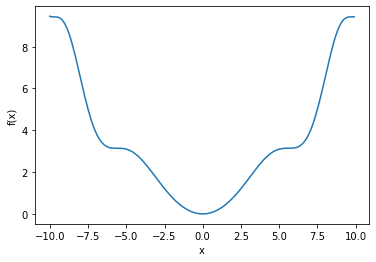

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# objective function
def f(x):
    return 0.1*x**2 + np.sin(0.1*x**2)

def plotf(x, xdots):
    y = f(x)
    plt.plot(x,y)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.plot(xdots, f(xdots), 'bo')
    plt.show()
    
x = np.arange(-10, 10, 0.1)
plotf(x, np.array([]))

In [6]:
#first derivative
def df(x):
    return 0.2*x + 0.2*x*np.cos(0.1*(x**2))

# gradient descent for single var
def grad_descent(df, x_prev, learn_rate, sequence):
    
    '''Approximate solution of f(x)=0 by Gradient Descent method.

    Parameters
    ----------
    df : function
        First derivative of f(x).
    x_prev : number
        Initial guess for a solution f(x)=0.
    learn_rate: number
        Step size of gradient descent.
    max_iter : integer
        Maximum number of iterations .

    Returns
    -------
    x_next : number
        The minimal value of function.
    sequence: array
        Intermidiate results of gradient descent
    grad_itter: number
        Number of iterations. '''
    
    # epsilon threshold - stopping criteria
    epsilon = 0.001
    
    # itterations number
    grad_itter = 1
    
    # vey first itteration of gradient descent
    x_next = x_prev - learn_rate*df(x_prev)
    sequence = np.append(sequence, x_next)

    # while abs(x_{t+1} - x_{t}) > threshold, keep itterating gradient descent
    while abs(x_next - x_prev) > epsilon:
        x_prev = x_next
        x_next = x_prev - learn_rate*df(x_prev)
        sequence = np.append(sequence, x_next)
        grad_itter += 1
        
    return (x_next, sequence, grad_itter)

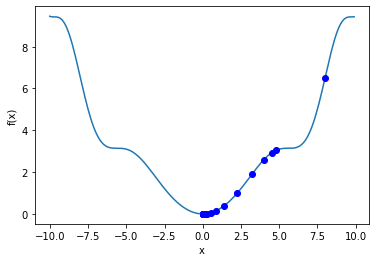

Minimum x-value from gradient descent: 0.0011070554765544726
Number of gradient descent iterations: 20


In [7]:
# apply gradient descent to objective function
grad_output = grad_descent(df = df, x_prev = 8, learn_rate = 1, sequence = np.array([8]))

plotf(x, grad_output[1])

# Print gradient descent solution
print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[2])

### Example for multiple variable function

__Objective function__:
$$f(x,y) = x^2 + y^2 + 1.$$ 

__Partial derivatives__:

$$\frac{df(x)}{dx} = f_{x} = 2x \text{  and  } \frac{df(y)}{dy} = f_{y} = 2y.$$ 


__Global minimum__ of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$

In [17]:
Z

array([[126.    , 124.01  , 122.04  , ..., 120.09  , 122.04  , 124.01  ],
       [123.5625, 121.5725, 119.6025, ..., 117.6525, 119.6025, 121.5725],
       [121.25  , 119.26  , 117.29  , ..., 115.34  , 117.29  , 119.26  ],
       ...,
       [119.0625, 117.0725, 115.1025, ..., 113.1525, 115.1025, 117.0725],
       [121.25  , 119.26  , 117.29  , ..., 115.34  , 117.29  , 119.26  ],
       [123.5625, 121.5725, 119.6025, ..., 117.6525, 119.6025, 121.5725]])

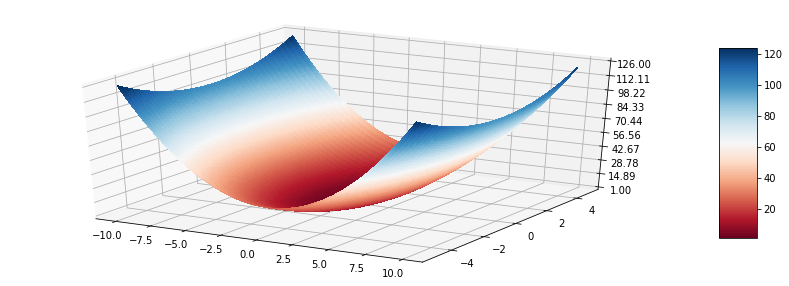

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#set objective function
def f(x,y):
    return x**2 + y**2 + 1

#plot function
y = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [9]:
def dfdx(x,y):
    return 2*x

def dfdy(x,y):
    return 2*y

# gradient vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

In [10]:
def grad_descent_mult(df,x_prev,learn_rate):
    
    epsilon = 0.001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate*grad_vector(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x,seq_y)

In [11]:
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

In [12]:
grad_output[2]

array([3.60000000e+00, 2.16000000e+00, 1.29600000e+00, 7.77600000e-01,
       4.66560000e-01, 2.79936000e-01, 1.67961600e-01, 1.00776960e-01,
       6.04661760e-02, 3.62797056e-02, 2.17678234e-02, 1.30606940e-02,
       7.83641641e-03, 4.70184985e-03, 2.82110991e-03, 1.69266594e-03,
       1.01559957e-03])

Minimum (x,y) from gradient descent: [0.0010156  0.00033853]
Number of gradient descent iterations: 17


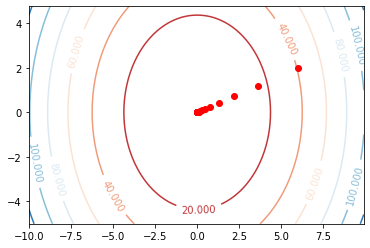

In [13]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

In [16]:
len(grad_output[3])

17

In [1]:
np.array([6,2])

NameError: name 'np' is not defined

## Specific gradient descents

### Stochastic Gradient Descent

Gradient descent algorithm may be infeasible when the training data size is very large.

$\textbf{Classic}$ gradient descent step to update parameters of the model:

$$ \textbf{$\theta_t$} := \textbf{$\theta_{t-1}$} - \eta \textbf{∇}_\theta J(\textbf{$\theta_{t-1}$})_,$$

where $\eta$ - learning rate;
$\theta$ - model's parameters;

We need to look through the full set of samples for gradient $\textbf{∇}_\theta J(\textbf{$\theta_{t-1}$})$ evaluation to obtain parameters $\theta$.
In a cases when data is very large it will be computationally expensive operation.
Thus, a __stochastic__ version of the algorithm is often used instead.

Stochastic gradient descent (SGD) in contrast performs a parameters (weights) update for $\textbf{each}$ training example $(i)$ and label $y^{(i)}$:

$$ \textbf{$\theta_{t}$} := \textbf{$\theta_{t-1}$} - \eta ∇_\theta J(\theta^{(i)}_{t-1}),$$

wher $J(\theta)$ - objective (loss) function, $\theta$ - model's parameters, $\eta$ - learning rate.




### Gradient descent with momentum

This is a method that helps accelerate GD in the relevant direction and suppresses oscillations. It implies adding a fraction $\beta$ of the previous vector adding the fraction $(1 - \beta)$ of the upcoming gradient. 
This approach is called "exponential moving average":

$$V_t = \beta V_{t-1} + (1 - \beta) g_t$$
$$ \textbf{$\theta_{t}$} := \textbf{$\theta_{t-1}$} - \eta V_t,$$

where $g_t$ - is the current gradient.

$\beta$ is usually set to 0.9.


### RMSprop

Root Mean Square propagation algorithm updates paramemters accordingly to the square of the upcoming gradients and adapts learning rate:

$$V_t = \beta V_{t-1} + (1 - \beta) g_t^2$$

$$ \textbf{$\theta_{t}$} := \textbf{$\theta_{t-1}$} - \eta \frac{g_t}{\sqrt{V_t} + \epsilon}$$

Adaptive learning rate with the square root in the last formula provides faster learning in the desirable direction to the local minimum.


### Adam

Adam  (Adaptive momentum algorithm) combines momentum and RMSprop approaches:

- computes adaptive learning rates;
- storing an exponentially moving average of past squared gradients

and uses scaling of the gradients:

$${V_t^{corr}}= \frac{V_t}{1 - \beta^t}$$

Parameters:
- learning rate $\eta$
- $\beta_1$
- $\beta_2$
- $\epsilon$

The moving averages of past and past squared gradients $V_t$ and $S_t$ respectively are computed as follows:

$$V_t = \beta_1 V_{t-1} + (1 - \beta_1)g_t$$
$$S_t = \beta_2 S_{t-1} + (1 - \beta_2)g^2_t$$

Adam update rule for the model weights:

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{{S_t^{corr}}} + \epsilon}{V_t}$$

Suggested values for $\beta_1$ is 0.9, for $\beta_2$ is 0.999 and $10^{-8}$ for $\epsilon$.

## Digits recognition example

### Step 1. Download and plot digits

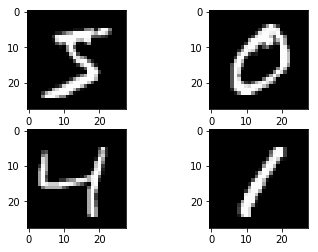

In [69]:
# using keras framework
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [70]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import np_utils

### Step 2. Prepare data for training

In [71]:
seed = 7
numpy.random.seed(seed)

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Step 3. Define model

In [72]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    return model

model = baseline_model()

### Step 4. Build and fit models with diff optimizers

In [73]:
model = baseline_model()
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr = 0.0001, momentum = 0.9), metrics=['accuracy'])

# Fit the model
history_SGD = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)

In [74]:
# build the model
model = baseline_model()
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.0001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

# Fit the model
history_Adam = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)

In [75]:
# build the model
model = baseline_model()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = 0.0001,epsilon=0.01), metrics=['accuracy'])

# Fit the model
history_Adagrad = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)

### Step 5. Plot results

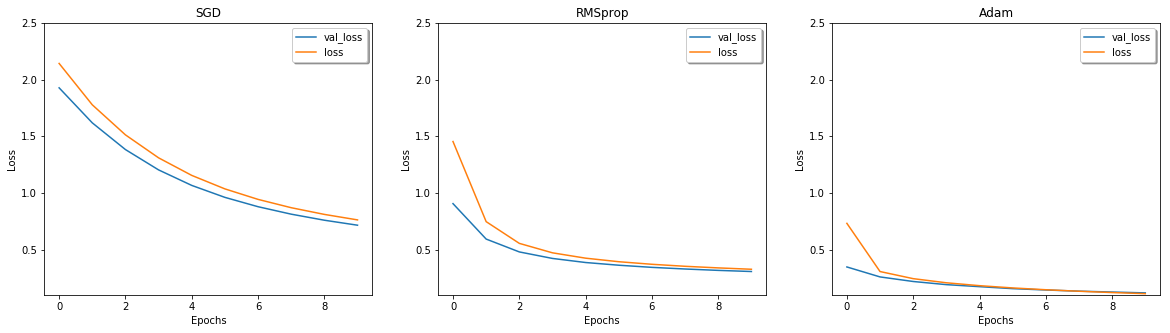

In [78]:
optimizers = ['SGD',  'RMSprop','Adam']
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
for i, h in enumerate([history_SGD,  history_Adagrad,history_Adam]):
    axs[i].set_ylim(0.1, 2.5)
    axs[i].plot(h.history['val_loss'], label='val_loss')
    axs[i].plot(h.history['loss'] , label='loss')
    axs[i].set_xlabel("Epochs")
    axs[i].set_ylabel("Loss")
    axs[i].set_title(optimizers[i])
    axs[i].legend(shadow=True, loc=1)

plt.show()